<a href="https://colab.research.google.com/github/Dipon12/Image-Super-Resolution-using-Autoencoder/blob/master/Image_High_Resolution_using_AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.2.0


## Encoder Function

In [0]:
encoder_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu',activity_regularizer=tf.keras.regularizers.l1(1e-10),input_shape=(256,256,3)),
    tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu',activity_regularizer=tf.keras.regularizers.l1(1e-10)),
    tf.keras.layers.MaxPooling2D((2,2),padding='same'),

    tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu',activity_regularizer=tf.keras.regularizers.l1(1e-10)),
    tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu',activity_regularizer=tf.keras.regularizers.l1(1e-10)),
    tf.keras.layers.MaxPooling2D((2,2),padding='same'),

    tf.keras.layers.Conv2D( 256, (3,3),padding='same',activation='relu',activity_regularizer=tf.keras.regularizers.l1(1e-10))

])



In [5]:
encoder_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 256)       2

In [5]:
'''
##Evabeo Model ta banano jay Bro!!
input_img = tf.keras.layers.Input(shape=(256,256,3))
l = tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu',activity_regularizer=tf.keras.regularizers.l1(1e-10))(input_img)
l = tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu',activity_regularizer=tf.keras.regularizers.l1(1e-10))(l)
l = tf.keras.layers.MaxPooling2D((2,2),padding='same')(l)

l = tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu',activity_regularizer=tf.keras.regularizers.l1(1e-10))(l)
l = tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu',activity_regularizer=tf.keras.regularizers.l1(1e-10))(l)
l = tf.keras.layers.MaxPooling2D((2,2),padding='same')(l)

last_layer = tf.keras.layers.Conv2D( 256, (3,3),padding='same',activation='relu',activity_regularizer=tf.keras.regularizers.l1(1e-10))(l)

e_model = tf.keras.Model(input_img,last_layer)

e_model.summary()
'''

"\n##Evabeo Model ta banano jay Bro!!\ninput_img = tf.keras.layers.Input(shape=(256,256,3))\nl = tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu',activity_regularizer=tf.keras.regularizers.l1(1e-10))(input_img)\nl = tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu',activity_regularizer=tf.keras.regularizers.l1(1e-10))(l)\nl = tf.keras.layers.MaxPooling2D((2,2),padding='same')(l)\n\nl = tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu',activity_regularizer=tf.keras.regularizers.l1(1e-10))(l)\nl = tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu',activity_regularizer=tf.keras.regularizers.l1(1e-10))(l)\nl = tf.keras.layers.MaxPooling2D((2,2),padding='same')(l)\n\nlast_layer = tf.keras.layers.Conv2D( 256, (3,3),padding='same',activation='relu',activity_regularizer=tf.keras.regularizers.l1(1e-10))(l)\n\ne_model = tf.keras.Model(input_img,last_layer)\n\ne_model.summary()\n"

## Auto Encoder Function (Encoder+Decoder)


In [6]:
"""
autoencoder_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu',activity_regularizer=tf.keras.regularizers.l1(1e-10),input_shape=(256,256,3)),
    tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu',activity_regularizer=tf.keras.regularizers.l1(1e-10)),
    tf.keras.layers.MaxPooling2D((2,2),padding='same'),

    tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu',activity_regularizer=tf.keras.regularizers.l1(1e-10)),
    tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu',activity_regularizer=tf.keras.regularizers.l1(1e-10)),
    tf.keras.layers.MaxPooling2D((2,2),padding='same'),

    tf.keras.layers.Conv2D( 256, (3,3),padding='same',activation='relu',activity_regularizer=tf.keras.regularizers.l1(1e-10)),

    ##Etotuk Encoder ...erpor decoder er part

    tf.keras.layers.UpSampling2D(),
    tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu',activity_regularizer=tf.keras.regularizers.l1(1e-10)),
    tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu',activity_regularizer=tf.keras.regularizers.l1(1e-10)),

    tf.keras.layers.add([get_layer('conv2d_3').output,get_layer('conv2d_6').output]),

    tf.keras.layers.UpSampling2D(),
    tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu',activity_regularizer=tf.keras.regularizers.l1(1e-10)),
    tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu',activity_regularizer=tf.keras.regularizers.l1(1e-10)),

    tf.keras.layers.add([get_layer('conv2d_1').output,get_layer('conv2d_8').output]),


    tf.keras.layers.Conv2D(3,(3,3),padding='same',activation='relu',activity_regularizer=tf.keras.regularizers.l1(1e-10))
])
"""


"\nautoencoder_model = tf.keras.models.Sequential([\n    tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu',activity_regularizer=tf.keras.regularizers.l1(1e-10),input_shape=(256,256,3)),\n    tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu',activity_regularizer=tf.keras.regularizers.l1(1e-10)),\n    tf.keras.layers.MaxPooling2D((2,2),padding='same'),\n\n    tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu',activity_regularizer=tf.keras.regularizers.l1(1e-10)),\n    tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu',activity_regularizer=tf.keras.regularizers.l1(1e-10)),\n    tf.keras.layers.MaxPooling2D((2,2),padding='same'),\n\n    tf.keras.layers.Conv2D( 256, (3,3),padding='same',activation='relu',activity_regularizer=tf.keras.regularizers.l1(1e-10)),\n\n    ##Etotuk Encoder ...erpor decoder er part\n\n    tf.keras.layers.UpSampling2D(),\n    tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu',activity_regulari

In [0]:
target_height = 300
target_width = 300


input_img = tf.keras.layers.Input(shape=(target_height,target_width,3))
l1 = tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu',activity_regularizer=tf.keras.regularizers.l1(1e-10))(input_img)
l2 = tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu',activity_regularizer=tf.keras.regularizers.l1(1e-10))(l1)
l3 = tf.keras.layers.MaxPooling2D((2,2),padding='same')(l2)

l4 = tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu',activity_regularizer=tf.keras.regularizers.l1(1e-10))(l3)
l5 = tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu',activity_regularizer=tf.keras.regularizers.l1(1e-10))(l4)
l6 = tf.keras.layers.MaxPooling2D((2,2),padding='same')(l5)

encoded_output =  tf.keras.layers.Conv2D( 256, (3,3),padding='same',activation='relu',activity_regularizer=tf.keras.regularizers.l1(1e-10))(l6)

##Etotuk Encoder ...erpor decoder er part

l8 =  tf.keras.layers.UpSampling2D()(encoded_output)
l9 =  tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu',activity_regularizer=tf.keras.regularizers.l1(1e-10))(l8)
l10 = tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu',activity_regularizer=tf.keras.regularizers.l1(1e-10))(l9)

l11 = tf.keras.layers.add([l5,l10])

l12 = tf.keras.layers.UpSampling2D()(l11)
l13 = tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu',activity_regularizer=tf.keras.regularizers.l1(1e-10))(l12)
l14 = tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu',activity_regularizer=tf.keras.regularizers.l1(1e-10))(l13)

l15 = tf.keras.layers.add([l2,l14])


decoded_output = tf.keras.layers.Conv2D(3,(3,3),padding='same',activation='relu',activity_regularizer=tf.keras.regularizers.l1(1e-10))(l15)

autoencoder = tf.keras.models.Model(input_img,decoded_output)

In [7]:
autoencoder.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 300, 300, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 300, 300, 64) 36928       conv2d_5[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_2 (MaxPooling2D)  (None, 150, 150, 64) 0           conv2d_6[0][0]                   
______________________________________________________________________________________________

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [9]:
cd 'drive/My Drive/All Project Works/My Fancy Project/Image High Resolution'

/content/drive/My Drive/All Project Works/My Fancy Project/Image High Resolution


In [10]:
ls

 autoencoder_model.json                            logs/
 autoencoder_model_weights.h5                      low_res_car_0.3/
 cars/                                             low_res_car_0.5/
 completed_notebook_image_super_resolution.ipynb   test_image.jpeg
'Image High Resolution using AutoEncoder.ipynb'


In [0]:
autoencoder.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])

In [0]:
import os
import re
import numpy as np
from scipy import ndimage, misc
from skimage.transform import resize, rescale
import skimage

import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img

In [0]:
def rescaling_images(img,scaling_factor=0.5):

  image = np.array(img)

  im_r = image[:,:,0]
  im_g = image[:,:,1]
  im_b = image[:,:,2]

  for i in range(3):
      im_scaled_r = np.expand_dims(rescale(im_r,scaling_factor),axis=2)
      im_scaled_g = np.expand_dims(rescale(im_g,scaling_factor),axis=2)
      im_scaled_b = np.expand_dims(rescale(im_b,scaling_factor),axis=2)
      
  image_rescaled=np.concatenate((im_scaled_r,im_scaled_g,im_scaled_b),axis=2)

  return image_rescaled

[[[ 92  78  67]
  [ 82  68  57]
  [ 79  67  53]
  ...
  [249 249 251]
  [251 251 253]
  [251 251 253]]

 [[ 89  75  64]
  [ 93  79  68]
  [112  98  85]
  ...
  [249 249 251]
  [251 251 253]
  [251 251 253]]

 [[102  85  75]
  [121 105  92]
  [168 155 139]
  ...
  [250 250 252]
  [251 251 253]
  [251 251 253]]

 ...

 [[ 44  24  17]
  [ 41  21  14]
  [ 42  22  13]
  ...
  [ 57  48  43]
  [ 56  47  42]
  [ 57  47  45]]

 [[ 45  25  18]
  [ 41  21  14]
  [ 40  20  11]
  ...
  [ 47  39  36]
  [ 49  41  38]
  [ 51  41  39]]

 [[ 47  27  20]
  [ 42  22  15]
  [ 39  19  10]
  ...
  [ 42  37  33]
  [ 46  38  35]
  [ 47  39  36]]]
(60, 90, 3)


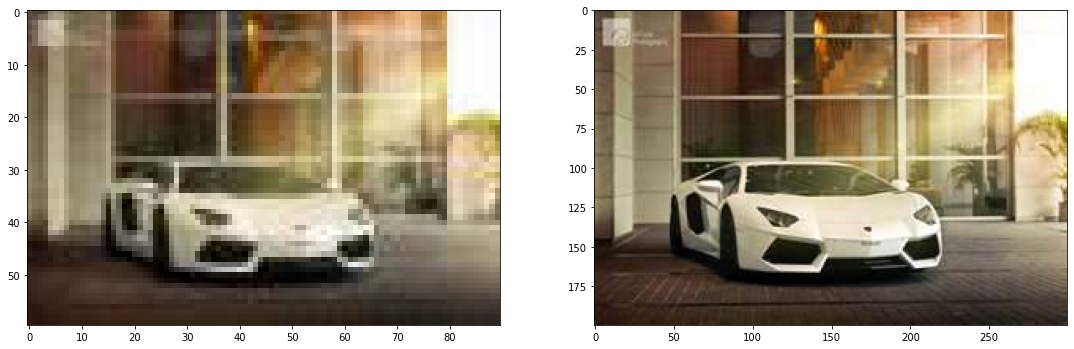

In [30]:
high_res_img_path = os.getcwd()+'/cars'
low_res_img_path = os.getcwd()+'/low_res_car_0.3'

all_images_name = os.listdir(high_res_img_path)

index = int(np.random.randint(low=0,high=len(all_images_name)-1, size=1))

img_path = low_res_img_path + '/' + all_images_name[index]
test_image = plt.imread(img_path)

img_path = high_res_img_path + '/' + all_images_name[index]
actual_image = plt.imread(img_path)

plt.figure(figsize = (100,100))

plt.subplot(10,10,1)
plt.imshow(test_image)

plt.subplot(10,10,2)
plt.imshow(actual_image)

print(test_image)
print(test_image.shape)

In [16]:
## A Function that downscales image by factor of 3 and saves
## No need to save low res image in directory if not necessery
'''

filenames = os.listdir(os.getcwd()+'/cars')
count = 1
number_of_files = len(filenames)

for img in filenames:
  print("{}/{} files are done".format(count,number_of_files))
  count = count+1
  image = load_img(os.getcwd()+'/cars/'+img)
  rescaled_img = rescaling_images(image,0.3)
  rescaled_img = (rescaled_img*255).astype('uint8')
  rescaled_img = Image.fromarray(rescaled_img)
  rescaled_img.save(os.getcwd()+"/low_res_car/" + img)

'''


'\n\nfilenames = os.listdir(os.getcwd()+\'/cars\')\ncount = 1\nnumber_of_files = len(filenames)\n\nfor img in filenames:\n  print("{}/{} files are done".format(count,number_of_files))\n  count = count+1\n  image = load_img(os.getcwd()+\'/cars/\'+img)\n  rescaled_img = rescaling_images(image,0.3)\n  rescaled_img = (rescaled_img*255).astype(\'uint8\')\n  rescaled_img = Image.fromarray(rescaled_img)\n  rescaled_img.save(os.getcwd()+"/low_res_car/" + img)\n\n'

In [17]:
  ##This process recquires huge RAM...better to divide the dataset into batches

"""
def train_batches():

  number_of_epochs=4
  images = []
  low_res_img = []
  high_res_img = []

  low_res_img_arr = []
  high_res_img_arr = []

  train_path = os.getcwd()+'/cars_train'

  images_name = os.listdir(train_path)
  images_name = images_name[:1200]

  for filename in images_name:

    filepath = os.path.join(train_path,filename)

    img = plt.imread(filepath)
    low_res = rescaling_images(img) #sent original image for rescaling and saved it in low_res

    img = skimage.transform.resize(img,(target_height,target_width))
    high_res_img.append(img)


    low_res = skimage.transform.resize(low_res,(target_height,target_width))
    low_res_img.append(low_res)

    low_res_img_arr = np.array(low_res_img)
    high_res_img_arr = np.array(high_res_img)


  autoencoder.fit(low_res_img_arr,high_res_img_arr,epochs=number_of_epochs,batch_size=10,shuffle=True)
  """



"\ndef train_batches():\n\nnumber_of_epochs=4\nimages = []\nlow_res_img = []\nhigh_res_img = []\n\nlow_res_img_arr = []\nhigh_res_img_arr = []\n\ntrain_path = os.getcwd()+'/cars_train'\n\nimages_name = os.listdir(train_path)\nimages_name = images_name[:1200]\n\nfor filename in images_name:\n\n  filepath = os.path.join(train_path,filename)\n\n  img = plt.imread(filepath)\n  low_res = rescaling_images(img) #sent original image for rescaling and saved it in low_res\n\n  img = skimage.transform.resize(img,(target_height,target_width))\n  high_res_img.append(img)\n\n\n  low_res = skimage.transform.resize(low_res,(target_height,target_width))\n  low_res_img.append(low_res)\n\n  low_res_img_arr = np.array(low_res_img)\n  high_res_img_arr = np.array(high_res_img)\n\n\nautoencoder.fit(low_res_img_arr,high_res_img_arr,epochs=number_of_epochs,batch_size=10,shuffle=True)\n"

In [0]:
def train_batches(number_of_epochs=5, no_of_images_in_single_batch = 16):


  mini_batch_no = int(len(all_images_name)/no_of_images_in_single_batch)

  for epo in range(number_of_epochs):
    print("===============================Epoch No: {}/{}==================================\n\n".format(epo+1,number_of_epochs))

    for mini_batch in range(mini_batch_no):
      print("\n--------------------Mini Batch No. {}/{}-------------------\n".format(mini_batch+1,mini_batch_no))

      low_res_img_arr = []
      high_res_img_arr = []

      images_name = all_images_name[mini_batch*no_of_images_in_single_batch: (mini_batch+1)*no_of_images_in_single_batch]

      for img_name in images_name:
        
        low_img_path = os.path.join(low_res_img_path,img_name)
        high_img_path = os.path.join(high_res_img_path,img_name)

        low_res_img = plt.imread(low_img_path)
        high_res_img = plt.imread(high_img_path)


        if len(high_res_img.shape)>2:
          low_res_img = skimage.transform.resize(low_res_img,(target_height,target_width))
          high_res_img = skimage.transform.resize(high_res_img,(target_height,target_width))

          low_res_img_arr.append(low_res_img)
          high_res_img_arr.append(high_res_img)

      low_res_img_arr = np.array(low_res_img_arr)
      high_res_img_arr = np.array(high_res_img_arr)

      autoencoder.fit(low_res_img_arr,high_res_img_arr,epochs=5,shuffle=True)

In [21]:
train_batches()

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 1ms/step - loss: 0.0012 - accuracy: 0.8060
Epoch 3/5
1/1 [==============================] - 0s 1ms/step - loss: 0.0012 - accuracy: 0.7542
Epoch 4/5
1/1 [==============================] - 0s 1ms/step - loss: 0.0012 - accuracy: 0.7717
Epoch 5/5
1/1 [==============================] - 0s 1ms/step - loss: 0.0012 - accuracy: 0.8058

--------------------Mini Batch No. 78/461-------------------

Epoch 1/5
1/1 [==============================] - 0s 1ms/step - loss: 0.0018 - accuracy: 0.7512
Epoch 2/5
1/1 [==============================] - 0s 1ms/step - loss: 0.0018 - accuracy: 0.8185
Epoch 3/5
1/1 [==============================] - 0s 1ms/step - loss: 0.0019 - accuracy: 0.7462
Epoch 4/5
1/1 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 0.7789
Epoch 5/5
1/1 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 0.7834

--------------------Mini Batch No. 79/46

In [22]:
from keras.models import model_from_json


def saving_model(model_save=True):
  if model_save:
    
    autoencoder_model_json = autoencoder.to_json()
    with open("autoencoder_model.json", "w") as json_file:
        json_file.write(autoencoder_model_json)

    autoencoder.save_weights("autoencoder_model_weights.h5")
    print("Saved model to disk")

Using TensorFlow backend.


In [23]:
saving_model()

Saved model to disk


In [0]:
autoencoder.load_weights(os.getcwd() +'/autoencoder_model_weights.h5')

In [31]:
test_image = skimage.transform.resize(test_image,(target_height,target_width))
test_image = np.array(test_image)
test_image = np.expand_dims(test_image,axis=0)


test_result = autoencoder.predict(test_image)
print(test_result.shape)

(1, 300, 300, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


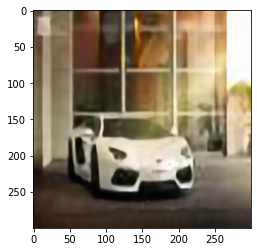

In [32]:
test_result = np.squeeze(test_result,axis=0)
plt.imshow(test_result)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


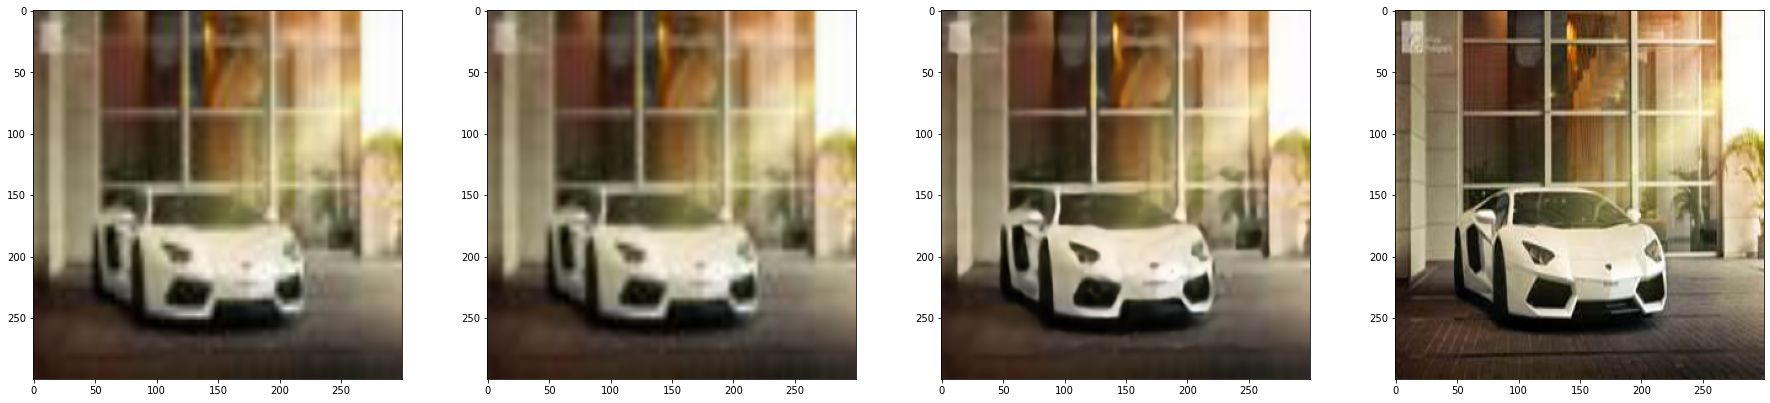

In [35]:
plt.figure(figsize=(80,80))

ax = plt.subplot(10, 10, 1)
plt.imshow(np.squeeze(test_image,axis=0))

ax = plt.subplot(10, 10, 2)
plt.imshow(np.squeeze(test_image,axis=0), interpolation="bicubic")

ax = plt.subplot(10, 10, 3)
plt.imshow(test_result)

ax = plt.subplot(10, 10, 4)
actual_image = skimage.transform.resize(actual_image,(target_height,target_width))
plt.imshow(actual_image)